In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
matfile = '/Users/bogao/DataFiles/new landscape/data/selected_gene_mat.pkl'
labelfile = '/Users/bogao/DataFiles/new landscape/data/all_bands_label.pkl'
weightfile = '/Users/bogao/DataFiles/new landscape/data/selected_genes_weight.pkl'
metafile = '/Users/bogao/DataFiles/new landscape/data/all_bands_meta.pkl'

In [3]:
with open(matfile, 'rb') as fmat, open(labelfile, 'rb') as flabel, open(metafile, 'rb') as fmeta:
    data = pickle.load(fmat)
    labels = pickle.load(flabel)
    meta = pickle.load(fmeta)


In [4]:
data = np.array(data)

In [13]:
meta = meta.dropna()

In [15]:
meta

,id,source,project,morphology,topography,num_segs,site
0,440e9ec5-8e61-4f75-b1d1-616941d9456d,TCGA,TCGA-OV,84413,Ovary,391,Ovary
1,6ca6f0fe-8b53-421e-ad4e-dfbf8c8c5b59,TCGA,TCGA-OV,84413,Ovary,571,Ovary
2,da9af00f-60ea-456b-9f25-0ab560962769,TCGA,TCGA-OV,84413,Ovary,431,Ovary
3,8e84a028-5e9c-4d01-9791-db0f04b05bce,TCGA,TCGA-OV,84603,Ovary,394,Ovary
4,d3f8c91f-e4cc-4018-9fbf-4368dd036b01,TCGA,TCGA-OV,84413,Ovary,252,Ovary
...,...,...,...,...,...,...,...
42815,PGX_AM_BS_GSM1414445,arraymap,GSE58579,84421,c56.9,104,Ovary
42816,PGX_AM_BS_GSM1414446,arraymap,GSE58579,84421,c56.9,240,Ovary
42817,PGX_AM_BS_GSM1414451,arraymap,GSE58579,84421,c56.9,79,Ovary
42818,PGX_AM_BS_GSM1431034,arraymap,GSE58579,84421,c56.9,133,Ovary


In [14]:
meta['morphology'].unique()

array(['84413', '84603', '94403', '85003', '85203', '85223', '85753',
       '90203', '84803', '80503', '85243', '80103', '85103', '80223',
       '85073', '85233', '85413', '83103', '83123', '80703', '93823',
       '94513', '94013', '94503', '94003', '80713', '80723', '80833',
       '81403', '87203', '87443', '87433', '87303', '87423', '87213',
       '82603', '83403', '82553', '87703', '83443', '83303', '85743',
       '83843', '80743', '80733', '81703', '81713', '81803', '84823',
       '82503', '85503', '82533', '82523', '82653', '83803', '82113',
       '81443', '81453', '88903', '88053', '88113', '90413', '88583',
       '98613', '82633', '87000', '86801', '86933', '87003', '86931',
       '83173', '80203', '88963', '95403', '88543', '87723', '87713',
       '89803', '89503', '89513', '81603', '90523', '87743', '85863',
       '90613', '90713', '90703', '90853', '83703', '96803', '81203',
       '81303', '90533', '84903', '85823', '85843', '90803', '85821',
       '85813', '858

In [16]:
meta.to_csv('/Users/bogao/DataFiles/new landscape/data/all_bands_meta.csv', index=False)

In [15]:
dd = data[labels == 'Ovary']

In [17]:
data.shape

(42820, 3029)

In [18]:
dd.shape

(2128, 3029)

In [19]:
data[1]

array([ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    , -1.1231])

In [21]:
with open(weightfile, 'rb') as fweight:
    weights = pickle.load(fweight)

In [30]:
weights.shape

(42820, 3029)

In [27]:
geneweightfile = '/Users/bogao/DataFiles/new landscape/data/selected_genes_weight.pkl'

In [28]:
with open(geneweightfile, 'rb') as fgweight:
    gweight = pickle.load(fgweight)

In [29]:
gweight.shape

(42820, 3029)

In [31]:
gg = weights[labels == 'Ovary']

In [32]:
gg.shape

(2128, 3029)

In [44]:
gg[:3][gg[:3]>0].shape

(1601,)

In [45]:
np.maximum(gng[:3], 0)

(1601,)

In [46]:
sum(gg).shape

(3029,)

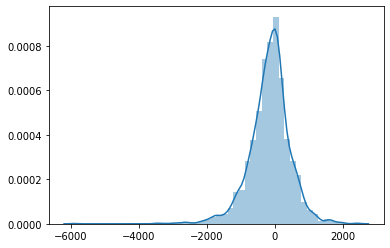

In [51]:
sns.distplot(sum(gg))

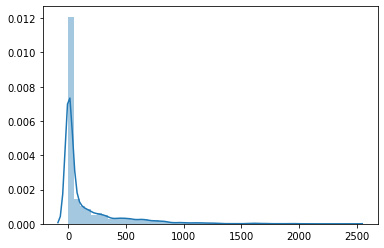

In [54]:
fig = sns.distplot(sum(np.maximum(gg,0)))

In [57]:
np.mean(sum(gg))

-145.53142156714716

In [59]:
np.std(sum(gg))

606.4314530545554

In [60]:
gs = sum(gg)

In [65]:
gs.shape

(3029,)

In [62]:
    ampgenesfile = '/Users/bogao/DataFiles/Data/genome/high_amp_genes.tsv'
    delgenesfile = '/Users/bogao/DataFiles/Data/genome/high_del_genes.tsv'

In [63]:
amp_genes =  pd.read_csv(ampgenesfile, sep='\t')

In [67]:
amp_genes = amp_genes.assign(weight = gs[:2294])

In [69]:
amp_genes[amp_genes['weight'] > np.std(gs)+np.mean(gs)]

,gene_id,name,chr,start,end,symbol,band,weight
14,ENSG00000158109,p36.32,1,3625015,3630127,TPRG1L,1p36.32,822.363766
21,ENSG00000169598,p36.32,1,3857267,3885429,DFFB,1p36.32,622.177467
24,ENSG00000180758,p36.22,1,9100305,9129102,GPR157,1p36.22,754.010686
25,ENSG00000049239,p36.22,1,9234775,9271337,H6PD,1p36.22,574.845317
37,ENSG00000142657,p36.22,1,10398592,10420511,PGD,1p36.22,638.617182
...,...,...,...,...,...,...,...,...
2254,ENSG00000100218,q11.23,22,23059415,23145021,RSPH14,22q11.23,689.594602
2263,ENSG00000250479,q11.23,22,23765834,23768443,CHCHD10,22q11.23,629.454642
2273,ENSG00000099984,q11.23,22,23980058,23983915,GSTT2,22q11.23,502.425471
2274,ENSG00000276950,q11.23,22,23998401,24005453,GSTT4,22q11.23,772.110188
